# House Prices - Advanced Regression Techniques
(Preços de casas - Técnicas Avançadas de Regressão)

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png" width=800>


- Vamos utilizar o [dataset disponível no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - É um dataset de **competição**
    - Temos uma base com a **descrição de cada uma das colunas (data_description.txt)**

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Importando o dataset de treino
base = pd.read_csv("train.csv")

In [5]:
# Visualizando essa base
base.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
# Retornando o shape da base
base.shape

(1460, 81)

In [6]:
# E as informações
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Começando a explorar os dados

In [15]:
# Visualizando quantidade de valores vazios
(base.isnull().sum()/base.shape[0]).sort_values(ascending=False).head(20).round(4) * 100

GarageYrBlt     5.55
GarageQual      5.55
GarageCond      5.55
GarageType      5.55
GarageFinish    5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
MasVnrArea      0.55
Electrical      0.07
LandSlope       0.00
LotConfig       0.00
LotShape        0.00
Street          0.00
LotArea         0.00
MSZoning        0.00
MSSubClass      0.00
Id              0.00
dtype: float64

In [13]:
# Podemos eliminar as colunas com mais de 10% de valores vazios
eliminar = base.columns[(base.isnull().sum()/base.shape[0]) > 0.1]
eliminar

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [14]:
# Eliminando essas colunas
base = base.drop(eliminar, axis=1)

- Queremos criar um primeiro modelo para verificar o quanto estamos errando e depois planejar como melhorar. Para isso:
    - Vamos **eliminar as colunas de texto**
    - Precisamos **tratar os valores vazios**
    - Vamos **escolher alguns algoritmos para testar e um método de avaliação de erro**

In [16]:
# Selecionando apenas as colunas numéricas
colunas = base.columns[base.dtypes != "object"]

In [17]:
# E criar uma nova base com esses valores
base2 = base.loc[:,colunas]

In [24]:
# Verificando os valores vazios
base2.isnull().sum().sort_values(ascending=False).head(3)

GarageYrBlt    81
MasVnrArea      8
LotArea         0
dtype: int64

In [25]:
# Substituindo os valores vazios por -1
base2 = base2.fillna(-1)

- Essa será nossa base inicial para começar

## Criando nosso modelo

- **Vamos separar em treino e teste**
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [26]:
from sklearn.model_selection import train_test_split
X = base2.drop("SalePrice", axis=1)
y = base2["SalePrice"]

In [27]:
# Separando essa base em treino e teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- **O próximo passo é selecionar os algoritmos que vamos utilizar. Podemos começar com os algoritmos mais simples como:**
    - Regressão Linear
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    - Árvore de Regressão
        - https://scikit-learn.org/stable/modules/tree.html#regression
    - KNeighborsRegressor
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

In [28]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression   

In [29]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [30]:
# Fazendo a previsão pros dados de teste
y_rl = reg_rl.predict(X_test)

In [31]:
# Importando a árvore de regressão
from sklearn.tree import DecisionTreeRegressor

In [32]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_ar = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

In [33]:
# Fazendo a previsão
y_ar = reg_ar.predict(X_test)

In [34]:
# Importando o KNN
from sklearn.neighbors import KNeighborsRegressor

In [35]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [36]:
# Fazendo a previsão
y_knn = reg_knn.predict(X_test)

- **E avaliar esses dados, utilizando tanto o erro absoluto quanto o quadrático:**
    - Erro médio absoluto
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
    - Erro quadrático médio
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [37]:
# Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [38]:
# E o erro quadrático médio
from sklearn.metrics import mean_squared_error

In [39]:
# Avaliando o erro da regressão
print("Erro médio absoluto: ", mean_absolute_error(y_test, y_rl))
print("Erro quadrático médio: ", mean_squared_error(y_test, y_rl))

Erro médio absoluto:  22764.02623654414
Erro quadrático médio:  1197736462.2396064


In [40]:
# da árvore de decisão
print("Erro médio absoluto: ", mean_absolute_error(y_test, y_ar))
print("Erro quadrático médio: ", mean_squared_error(y_test, y_ar))

Erro médio absoluto:  27420.577625570775
Erro quadrático médio:  1753168141.2123287


In [41]:
# e do knn
print("Erro médio absoluto: ", mean_absolute_error(y_test, y_knn))
print("Erro quadrático médio: ", mean_squared_error(y_test, y_knn))

Erro médio absoluto:  32618.238584474886
Erro quadrático médio:  2489885345.465183


- **Podemos plotar visualmente a relação do y_test com as previsões feitas**
    - Para isso vamos utilizar o matplotlib
        - https://matplotlib.org/

In [42]:
# Importando o matplotlib
import matplotlib.pyplot as plt

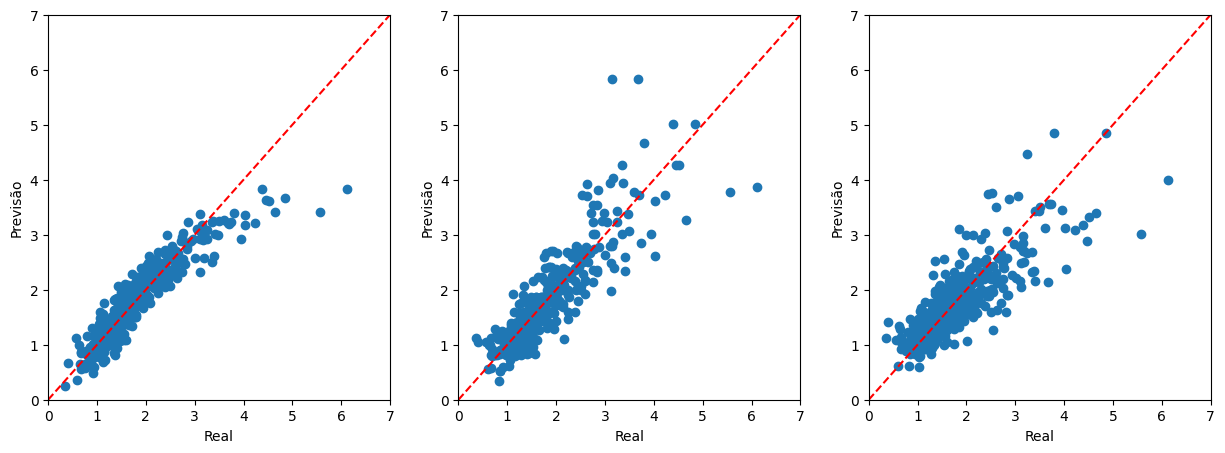

In [45]:
# Criando esse gráfico
y_pred = reg_rl.predict(X_test)  # Define y_pred as predictions from the linear regression model
y_pred_ar = reg_ar.predict(X_test)  # Define y_pred_ar as predictions from the Decision Tree Regressor
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].scatter(y_test / 100000, y_pred / 100000)
ax[0].plot([0, 7], [0, 7], '--r')
ax[1].scatter(y_test / 100000, y_pred_ar / 100000)
ax[1].plot([0, 7], [0, 7], '--r')
ax[2].scatter(y_test / 100000, y_knn / 100000)
ax[2].plot([0, 7], [0, 7], '--r')

ax[0].set(xlim=(0, 7), ylim=(0, 7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsão')
ax[1].set(xlim=(0, 7), ylim=(0, 7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsão')
ax[2].set(xlim=(0, 7), ylim=(0, 7))
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Previsão')

plt.show()

- **Vamos utilizar a Regressão Linear por ter sido o algoritmo com menor erro quadrático médio, a mesma métrica avaliada pelo Kaggle na hora de classificar os modelos**

## Fazendo a previsão para a base de teste da competição

In [48]:
# Importando a base de teste
teste = pd.read_csv("test.csv")

In [49]:
# Visualizando a base
teste.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


- **Agora vamos repetir os mesmos tratamentos que fizemos na base de treino**
    - Obs: **não podemos excluir linhas**

In [50]:
# Eliminando as mesmas colunas da base de treino
teste = teste.drop(eliminar, axis=1)

In [51]:
# Verificando as colunas numéricas
colunas2 = teste.columns[teste.dtypes != "object"]

In [52]:
# Mantendo também apenas as colunas numéricas
teste = teste.loc[:,colunas2]

In [53]:
# Verificando a base restante
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [54]:
# Visualizando quantidade de valores vazios
teste.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     78
MasVnrArea      15
BsmtHalfBath     2
BsmtFullBath     2
GarageCars       1
GarageArea       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFinSF1       1
MSSubClass       0
Id               0
OverallQual      0
LotArea          0
YearBuilt        0
2ndFlrSF         0
GrLivArea        0
OverallCond      0
1stFlrSF         0
YearRemodAdd     0
dtype: int64

- **Vamos precisar retirar os valores vazios pois a regressão linear não vai conseguir trabalhar com valores vazio**
    - Se tentarmos usar essa base, ele vai retornar um **erro** dizendo que o **input possui valores NaN**
- Podemos apenas substituir por -1 como fizemos acima

In [56]:
# Substituindo os valores vazios por -1
teste = teste.fillna(-1)

- **Agora podemos usar nosso modelo e ajustar os dados para usarmos no Kaggle**

In [58]:
y_pred = reg_rl.predict(teste)

In [59]:
# E extrair somente o Id e o SalePrice
teste["SalePrice"] = y_pred

In [61]:
# Podemos então exportar essa base.to_csv("submission.csv", index=False)
resultado = teste[["Id", "SalePrice"]]

In [62]:
resultado.to_csv("submission.csv", index=False)

- **Próximos passos**
    - Você pode tentar melhorar a limpeza dos seus dados 
        - [Limpeza de Dados em um Dataset Real - Dados do Titanic](https://www.youtube.com/watch?v=RuDxj894BXQ&t=1218s)
    - Depois é possível fazer a engenharia de recursos
        - [Feature Engineering em Python para Seus Projetos de Ciência de Dados](https://www.youtube.com/watch?v=rigZ7HdfWaM&t=61s)
    - A padronização / normalização dos dados
        - [Padronização e Normalização de Dados para Ciência de Dados](https://www.youtube.com/watch?v=L6rLSYVBfyM&t=12s)
    - E até a seleção de variáveis
        - [Seleção de Recursos (Feature Selection) em Projetos de Ciência de Dados](https://www.youtube.com/watch?v=0yM07AURFRY&t=615s)